## K-means Clustering

## 1. Create dataset

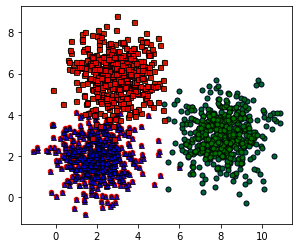

In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(28)

means = [[2, 2], [8, 3], [3, 6]] #Centroids
cov = [[1, 0], [0, 1]]
N = 500
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)

plt.scatter(X0[:, 0], X0[:, 1], 20, 'r')
plt.scatter(X1[:, 0], X1[:, 1], 20, 'b')
plt.scatter(X2[:, 0], X2[:, 1], 20, 'g')

kwargs = {"markersize": 5, "alpha": .8, "markeredgecolor": 'k'}
plt.plot(X0[:, 0], X0[:, 1], 'b^', **kwargs)
plt.plot(X1[:, 0], X1[:, 1], 'go', **kwargs)
plt.plot(X2[:, 0], X2[:, 1], 'rs', **kwargs)
plt.axis([-3, 14, -2, 10])
plt.axis('scaled')
plt.plot()

plt.show()

In [2]:
X = np.concatenate((X0, X1, X2), axis = 0)
y = np.asarray([0]*N + [1]*N + [2]*N).T
K = 3

## 2. Functions in Kmeans

In [3]:
from scipy .spatial.distance import cdist

def kmeans_init_centroids(X, k):
    #randomly pick k centroids in X
    return X[np.random.choice(X.shape[0], k, replace=False)]

def kmeans_assign_labels(X, centroids):
    #caculate distance btw data and centroid
    D = cdist(X, centroids)
    #return index of the closest centroid
    return np.argmin(D, axis = 1)

def has_converged(centroids, new_centroids):
    #return True if two sets of centroids are the same
    return (set([tuple(a) for a in centroids]) == set([tuple(a) for a in new_centroids]))

def kmeans_update_centroids(X, labels, K):
    centroids = np.zeros((K, X.shape[1]))
    for k in range(K):
        Xk = X[labels == k, :]
        centroids[k,:] = np.mean(Xk, axis = 0)
    return centroids

## 3. Kmeans Clustering

In [6]:
def kmeans(X, k):
    centroids = [kmeans_init_centroids(X,k)]
    labels = []
    it = 0
    while True:
        labels.append(kmeans_assign_labels(X, centroids[-1]))
        new_centroids = kmeans_update_centroids(X, labels[-1], K)
        if has_converged(centroids[-1], new_centroids):
            break
        centroids.append(new_centroids)
        it += 1
    return (centroids, labels, it)

(centroids, labels, it) = kmeans(X, K)
centroids[-1]

array([[2.94889061, 5.93946893],
       [1.98116596, 1.99870594],
       [8.04446848, 3.00606048]])

## 4. Kmeans with Scikit learn

In [5]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3, random_state = 0).fit(X)
print('Centers found by scikit learn:')
print(model.cluster_centers_)
pred_label = model.predict(X)

Centers found by scikit learn:
[[1.98192399 2.0026549 ]
 [8.04446848 3.00606048]
 [2.95007967 5.94341728]]


## 5. Kmeans for MNIST Classifier

In [7]:
from sklearn.datasets import fetch_openml

data_dir = '../data'
mnist = fetch_openml('mnist_784')
mnist.data.shape

(70000, 784)

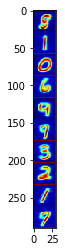

In [8]:
from sklearn.neighbors import NearestNeighbors
from display_network import *

K = 10
N = 10000
X = mnist.data[np.random.choice(mnist.data.shape[0], N)]
model = KMeans(n_clusters=K).fit(X)
pred_label = model.predict(X)

A = display_network(model.cluster_centers_.T, 10, 1)
f2 = plt.imshow(A, interpolation='nearest',cmap = plt.cm.jet )
plt.show()